## Tips and Hints
Note that the unit tests for Chapter 10 are quite exhaustive and can take 5-10 minutes to run. You may want to avoid running them each time you develop something in the Jupyter notebook. Also, keep in mind that you can run them separately using the following command.
```
python .\mav_sim\unit_tests\ch10_path_follower_test.py
```

You may find it easier to do your development outside of the Jupyter notebook using the "book_assignments\mavsim_chap10.py." However, make sure to insert the solution for each problem into Jupyter before exporting.

Numpy dot() and cross() functions require that the inputs be of the shape (3.) (i.e., a vector, not a matrix). I would recommend doing a little math beforehand and realize that the cross product is greatly simplified when the second vector is (0,0,1)^T.

## Problem 0: Path follower implementation
In `chap10.path_follower.py` implement the following two functions
* `follow_straight_line(...)`
* `follow_orbit(...)`

A few notes on implementation:
* Ensure to populate the entire autopilot command for each function
* Use the `wrap(...)` function as appropriate
* Only return a non-zero roll feed forward term for the circular orbit when $\frac{d-\rho}{\rho} < 10$
* Calculate the roll feed forward term assuming no wind

In [1]:
import numpy as np
from mav_sim.chap3.mav_dynamics import DynamicState
from mav_sim.chap10.run_sim import run_sim
from mav_sim.message_types.msg_path import MsgPath
from mav_sim.message_types.msg_state import MsgState
from mav_sim.message_types.msg_sim_params import MsgSimParams
from typing import Callable

from mav_sim.chap10.path_viewer import PathViewer
from mav_sim.chap3.data_viewer import DataViewer
from mav_sim.tools.display_figures import display_data_view, display_mav_view

# The viewers need to be initialized once due to restart issues with qtgraph
if 'path_view' not in globals():
    print("Initializing mav_view")
    global path_view
    path_view = PathViewer()  # initialize the mav viewer
if 'data_view' not in globals():
    print("Initializing data_view")
    global data_view
    data_view = DataViewer()  # initialize view of data plots

# Initialize the simulation parameters
sim_params_default = MsgSimParams(end_time=100.) # Sim ending in 10 seconds
state = DynamicState()

# Function for running simulation and displaying results
def run_sim_and_display(path_fnc: Callable[ [float, MsgState], MsgPath], sim_params: MsgSimParams = sim_params_default):
    global path_view
    global data_view
    data_view.reset(sim_params.start_time)
    (path_view, data_view) = run_sim(sim=sim_params, path_fnc=path_fnc, init_state=state, path_view=path_view, data_view=data_view)
    display_data_view(data_view)
    display_mav_view(path_view)

Initializing mav_view
Initializing data_view


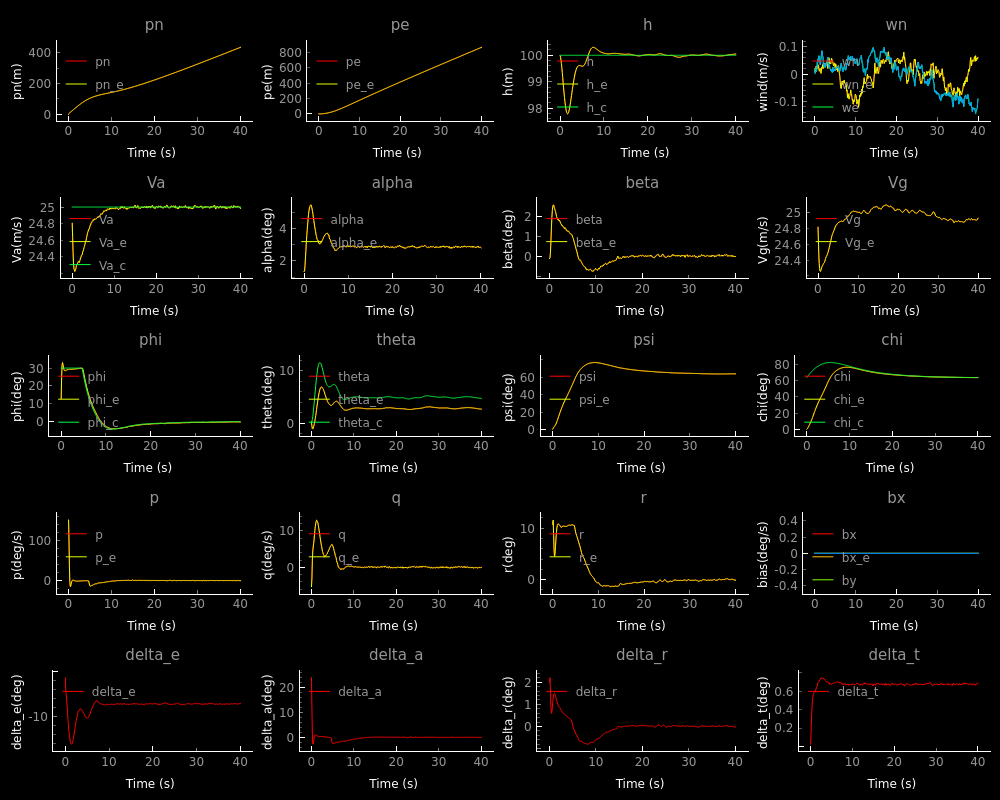

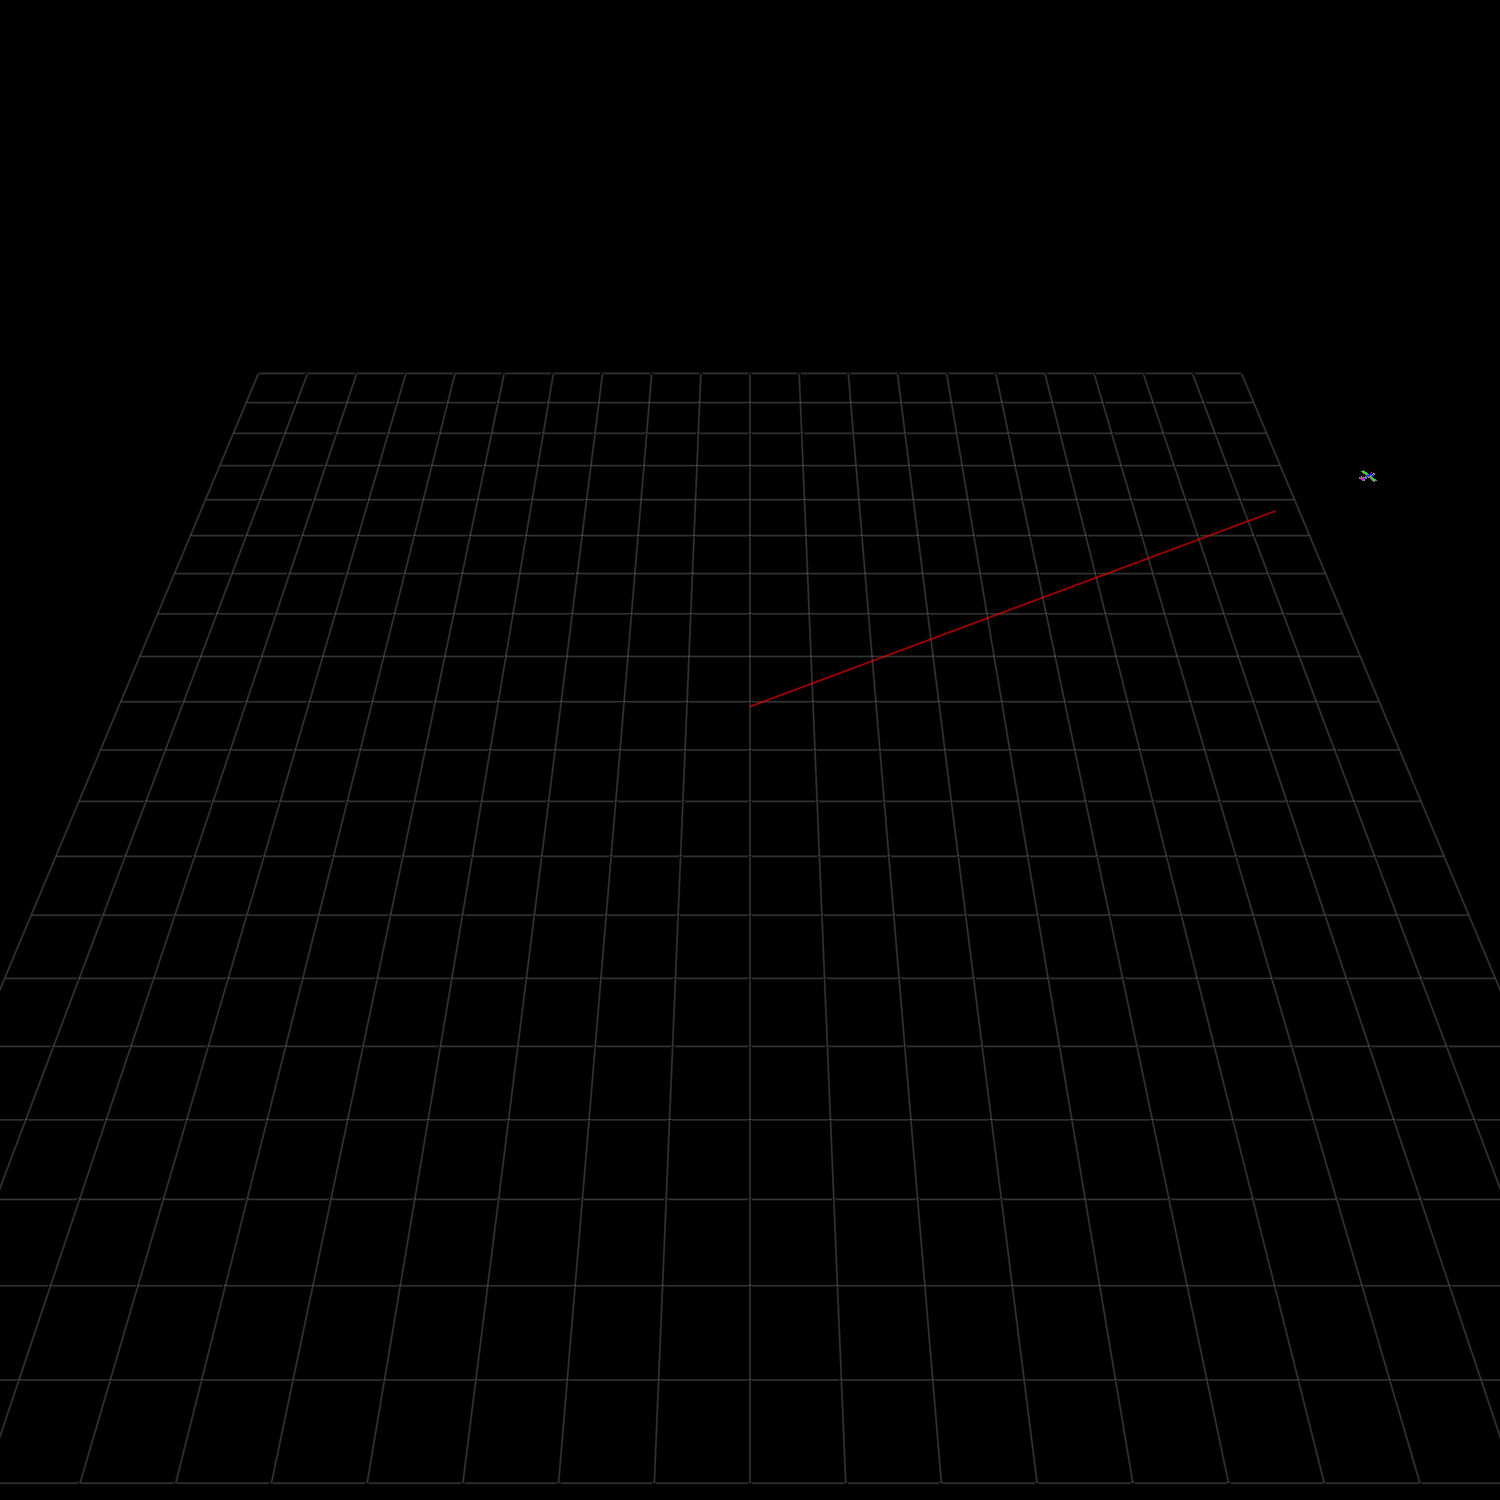

In [3]:
# path definition
path = MsgPath()
path.type = "line"
path.line_origin = np.array([[0.0, 0.0, -100.0]]).T
path.line_direction = np.array([[0.5, 1.0, 0.0]]).T
path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)

# Constant path function definition
def constant_path(time: float, state: MsgState) -> MsgPath:
    return path

# Follow path
run_sim_and_display(path_fnc=constant_path)

## Problem 1: Achievable Line Defined Between Points
Control the aircraft to follow a straight line path at 20 m/s where the line is defined by the points $w_0^i = \begin{bmatrix}0 \\ 2 \\ -100 \end{bmatrix}$ and $w_1^i = \begin{bmatrix}50 \\ 10 \\ -100 \end{bmatrix}$

### Describe the results
The plane follows along a straight line pointed from point $w_0^i$ to $w_1^i$ at 20 m/s

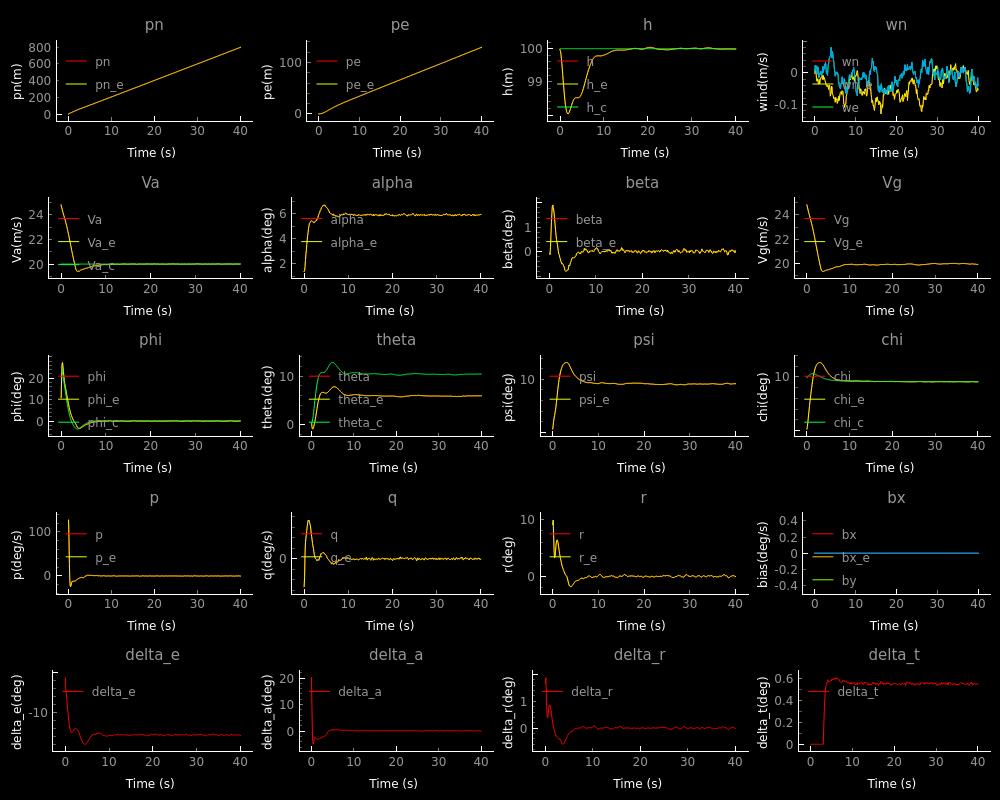

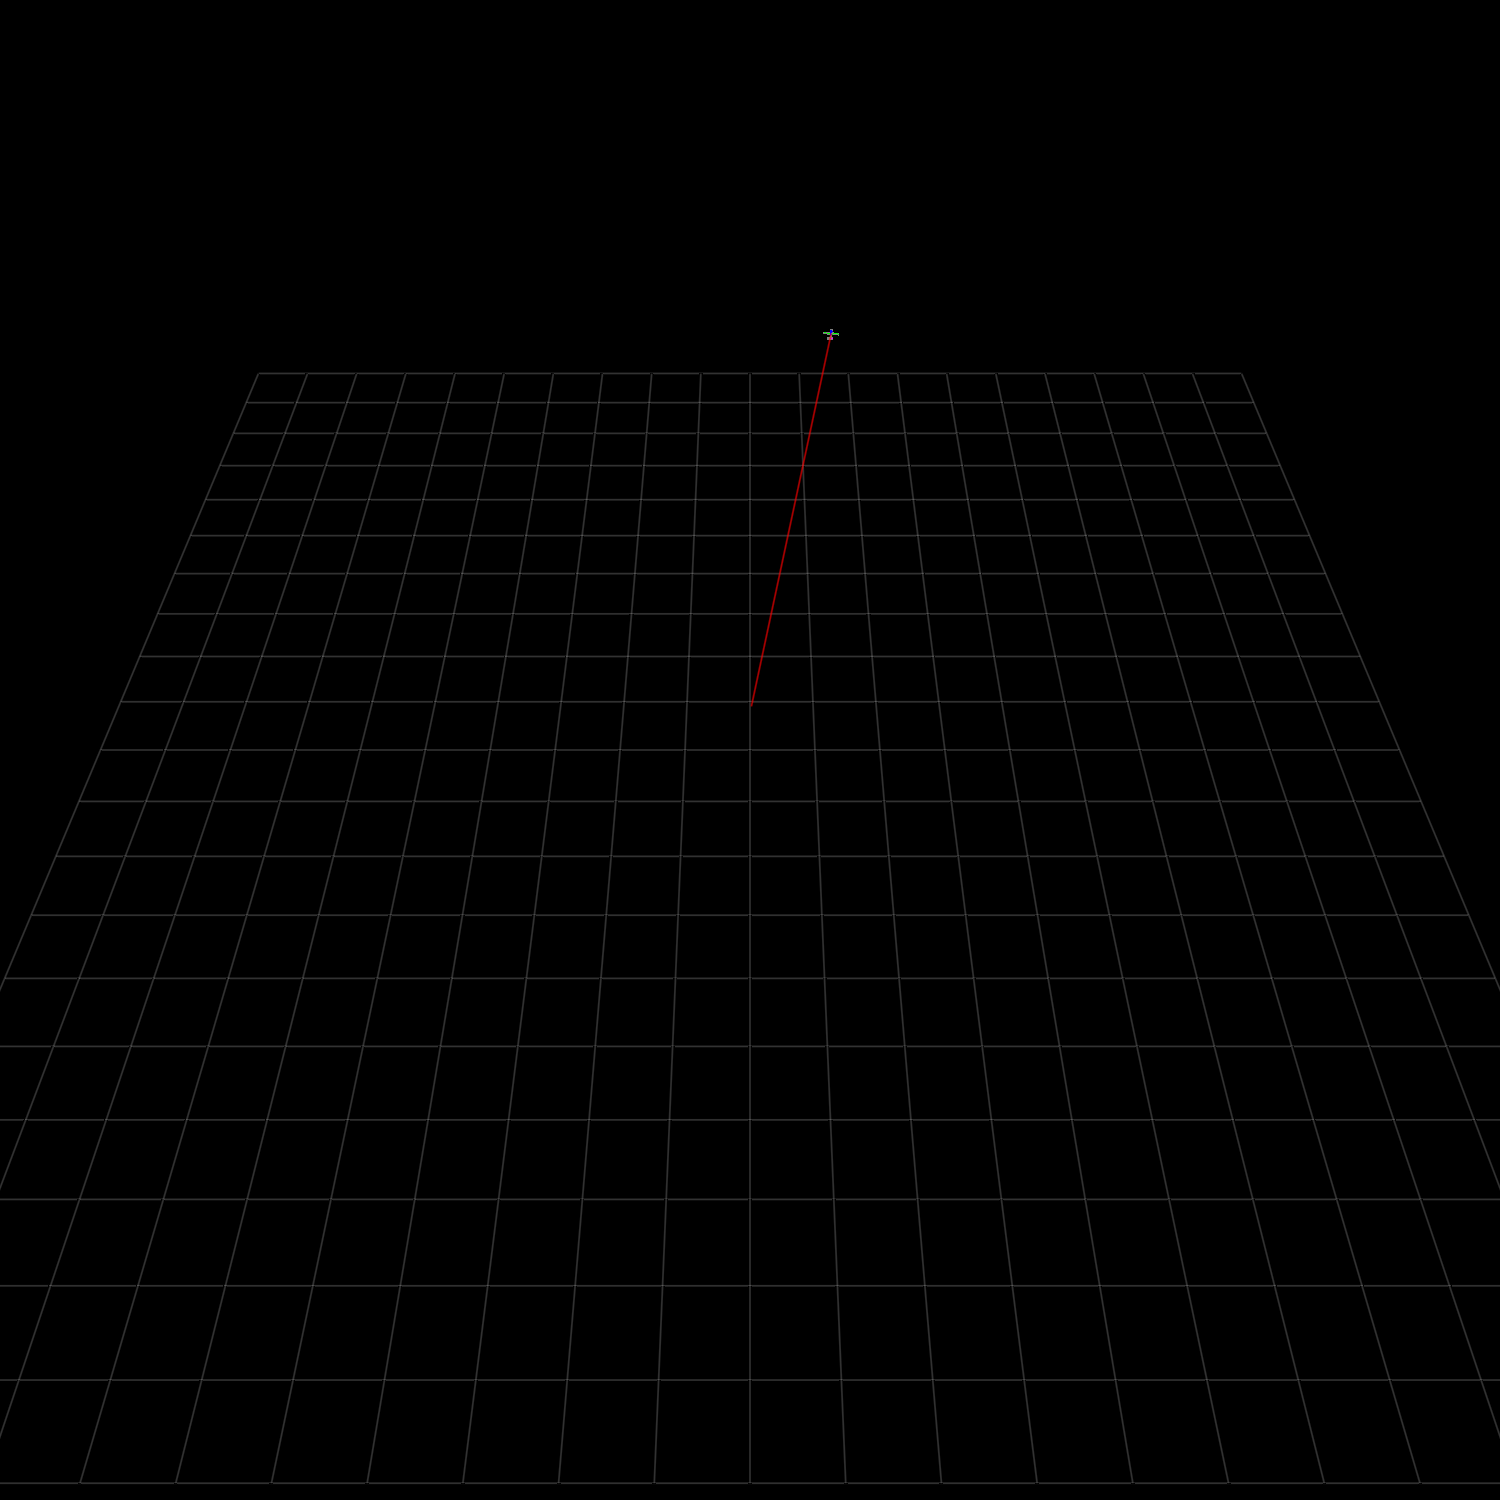

In [5]:
"""
mavsim_python
    - Chapter 10 assignment for Beard & McLain, PUP, 2012
    - Last Update:
        3/11/2019 - RWB
        2/27/2020 - RWB
        3/2022 - GND
"""

import numpy as np
from mav_sim.chap3.mav_dynamics import DynamicState
from mav_sim.chap10.run_sim import run_sim
from mav_sim.message_types.msg_path import MsgPath
from mav_sim.message_types.msg_sim_params import MsgSimParams
from mav_sim.message_types.msg_state import MsgState

def main() -> None:
    """Provide a test scenario for chapter 10"""
    # Initialize the simulation parameters
    sim_params = MsgSimParams(end_time=50.0)  # Sim ending in 10 seconds
    state = DynamicState()

    # given two points define the origin and direction of the line
    w_i_0 = np.array([[0.0, 2.0, -100.0]]).T
    w_i_1 = np.array([[50.0, 10.0, -100.0]]).T
    line_direction = w_i_1 - w_i_0
    airspeed = 20.0

    # path definition
    path = MsgPath()
    path.type = "line"
    path.line_origin = w_i_0
    path.line_direction = line_direction / np.linalg.norm(line_direction)
    path.airspeed = airspeed
    # path.line_origin = np.array([[0.0, 0.0, -100.0]]).T
    # path.line_direction = np.array([[0.5, 1.0, 0.0]]).T
    # path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)

    # path.type = 'orbit'
    # path.orbit_center = np.array([[0.0, 0.0, -100.0]]).T  # center of the orbit
    # path.orbit_radius = 300.0  # radius of the orbit
    # path.orbit_direction = 'CW'  # orbit direction: 'CW'==clockwise, 'CCW'==counter clockwise

    def constant_path(_: float, __: MsgState) -> MsgPath:
        return path

    run_sim_and_display(path_fnc=constant_path)

if __name__ == "__main__":
    main()


## Problem 2: Near-Achievable Line Defined Between Points
Control the aircraft to follow a straight line path at 30 m/s where the line is defined by the points $w_0^i = \begin{bmatrix}0 \\ 2 \\ -100 \end{bmatrix}$ and $w_1^i = \begin{bmatrix}100 \\ 200 \\ -150 \end{bmatrix}$

### Describe the results
Going along stright line in the North East direction at 30 m/s. After chagning the course angle the plane follows the line pretty percisly. 


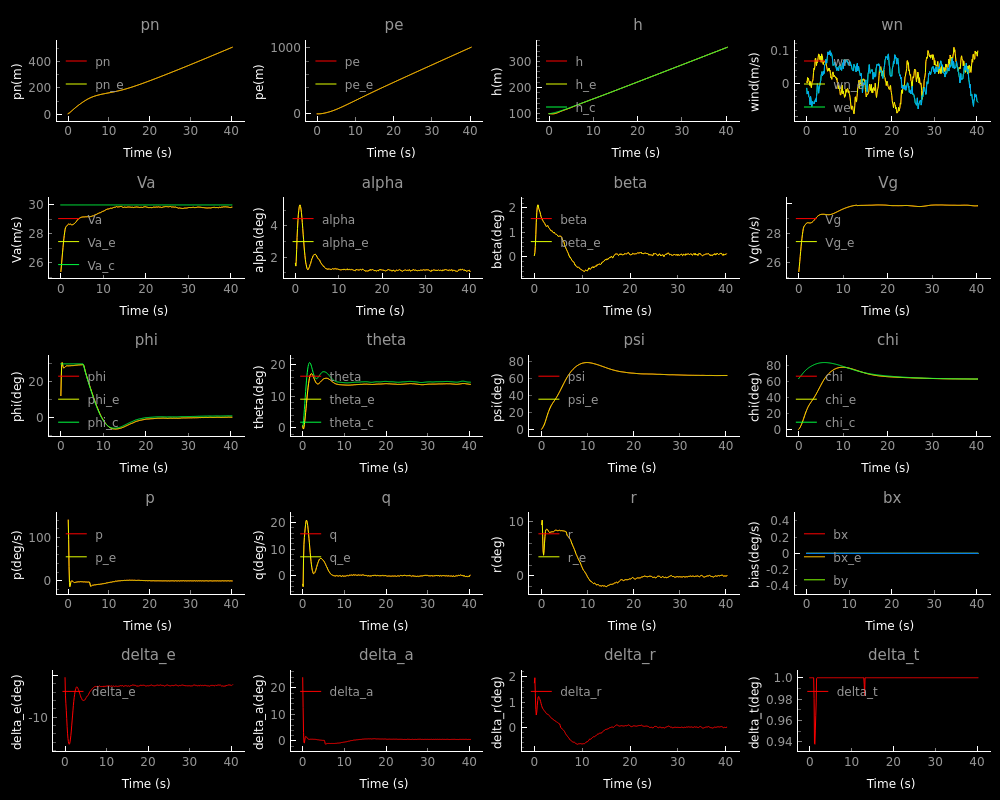

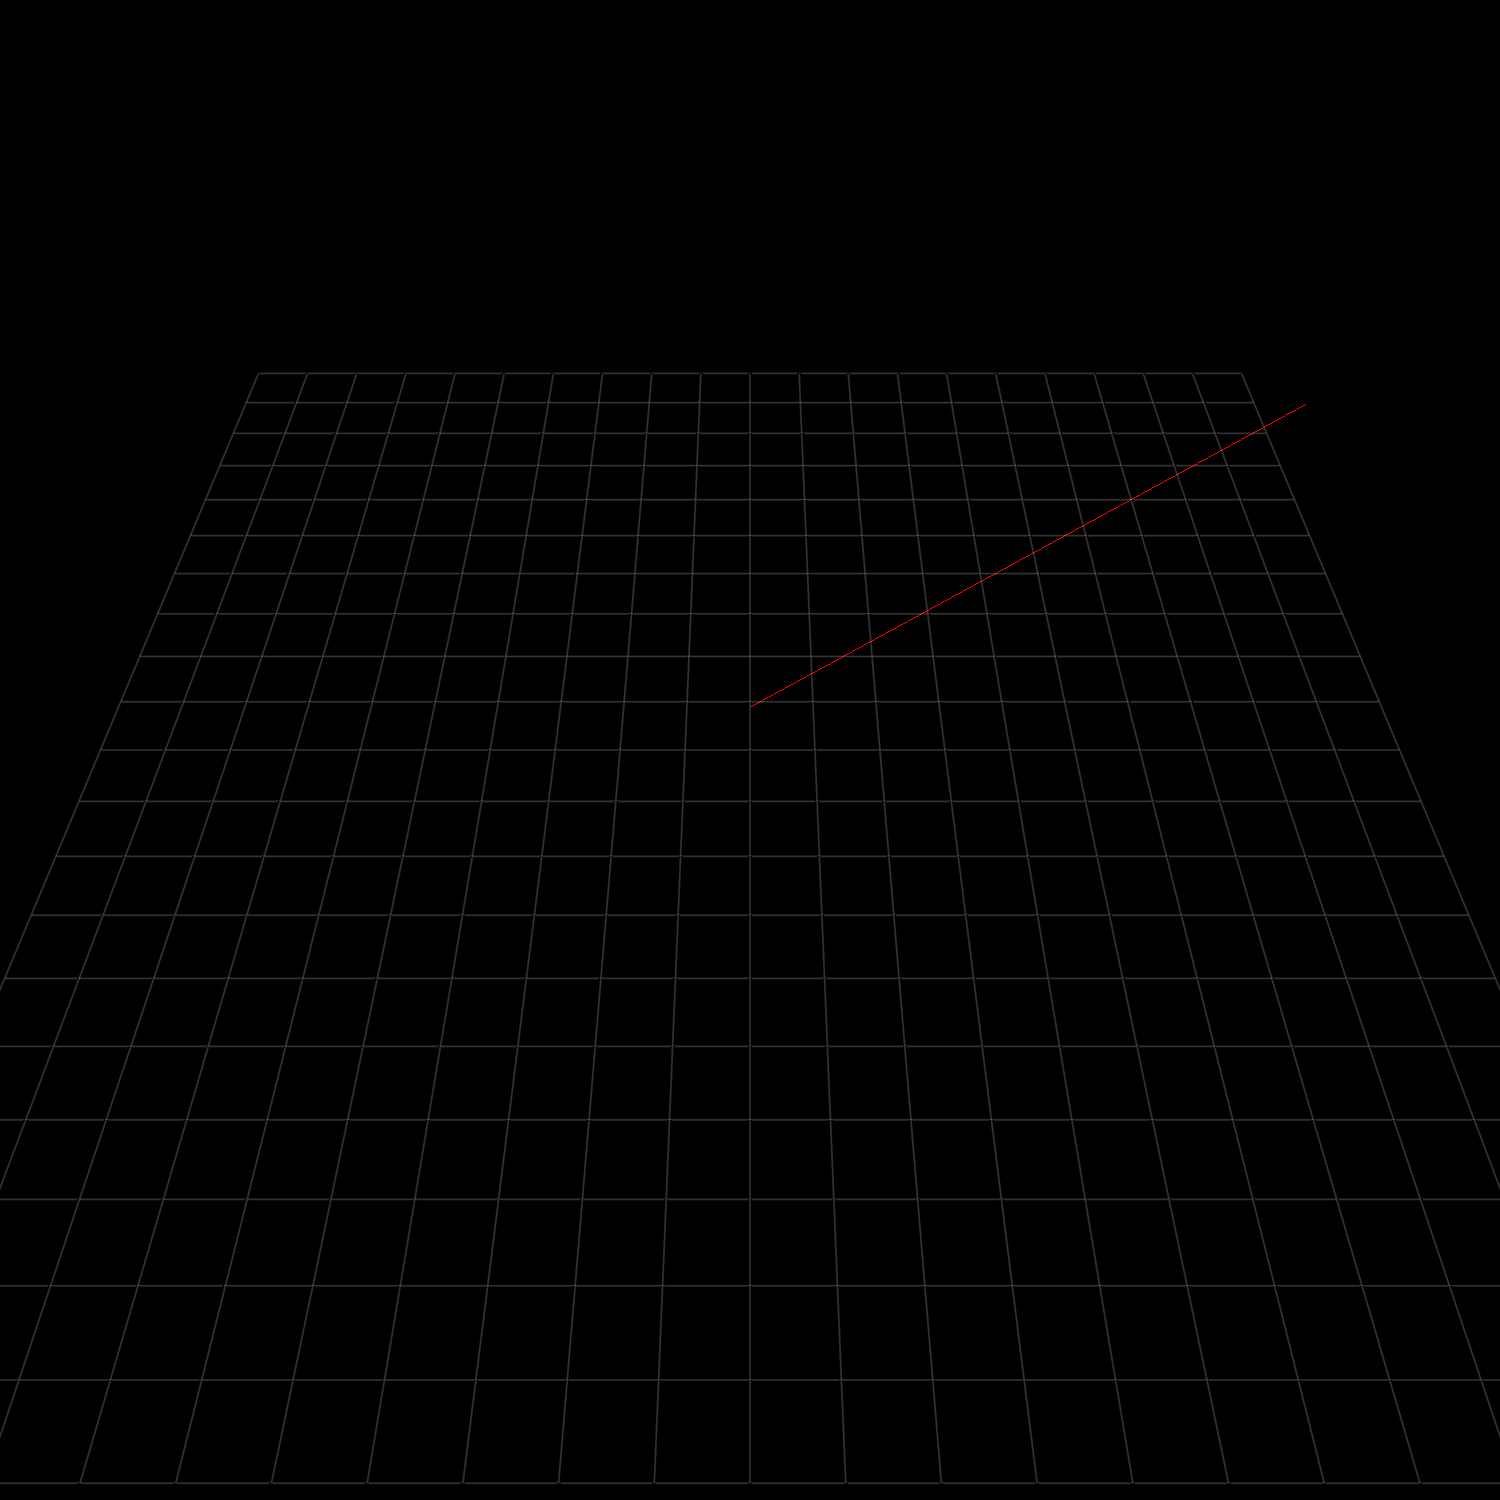

In [6]:
def main() -> None:
    """Provide a test scenario for chapter 10"""
    # Initialize the simulation parameters
    sim_params = MsgSimParams(end_time=50.0)  # Sim ending in 10 seconds
    state = DynamicState()

    # given two points define the origin and direction of the line
    w_i_0 = np.array([[0.0, 2.0, -100.0]]).T
    w_i_1 = np.array([[100.0, 200.0, -150.0]]).T
    line_direction = w_i_1 - w_i_0
    airspeed = 30.0

    # path definition
    path = MsgPath()
    path.type = "line"
    path.line_origin = w_i_0
    path.line_direction = line_direction / np.linalg.norm(line_direction)
    path.airspeed = airspeed
    # path.line_origin = np.array([[0.0, 0.0, -100.0]]).T
    # path.line_direction = np.array([[0.5, 1.0, 0.0]]).T
    # path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)

    # path.type = 'orbit'
    # path.orbit_center = np.array([[0.0, 0.0, -100.0]]).T  # center of the orbit
    # path.orbit_radius = 300.0  # radius of the orbit
    # path.orbit_direction = 'CW'  # orbit direction: 'CW'==clockwise, 'CCW'==counter clockwise

    def constant_path(_: float, __: MsgState) -> MsgPath:
        return path

    run_sim_and_display(path_fnc=constant_path)

if __name__ == "__main__":
    main()


## Problem 3: Non-Achievable Line Defined Between Points
Control the aircraft to follow a straight line path at 30 m/s where the line is defined by the points $w_0^i = \begin{bmatrix}0 \\ 2 \\ -100 \end{bmatrix}$ and $w_1^i = \begin{bmatrix}100 \\ 200 \\ -200 \end{bmatrix}$

### Describe the results
Going along stright line in the North East direction at 30 m/s. After chagning the course angle the plane follows the line pretty percisly. The plane glides along the path as it falls.

### What do you notice about the z-component of the line direction definition and the ability to track the line?
When the line is pointed down with a lower z component will allow us to glide downward that direction and take alot less control to be able to do so.

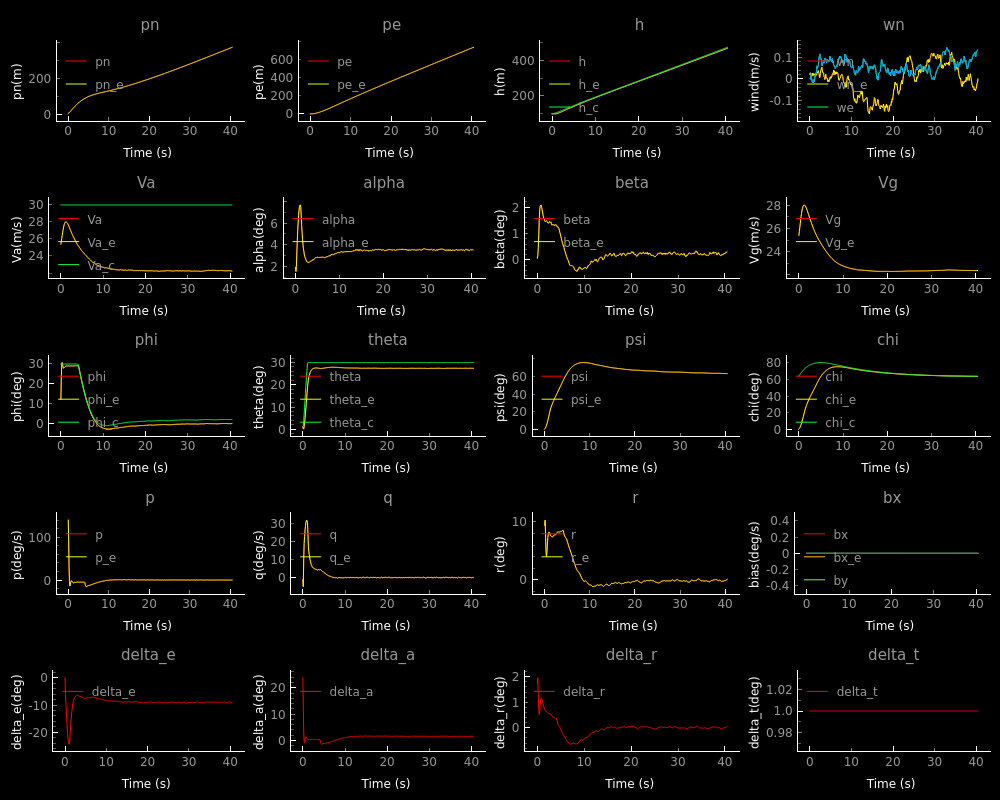

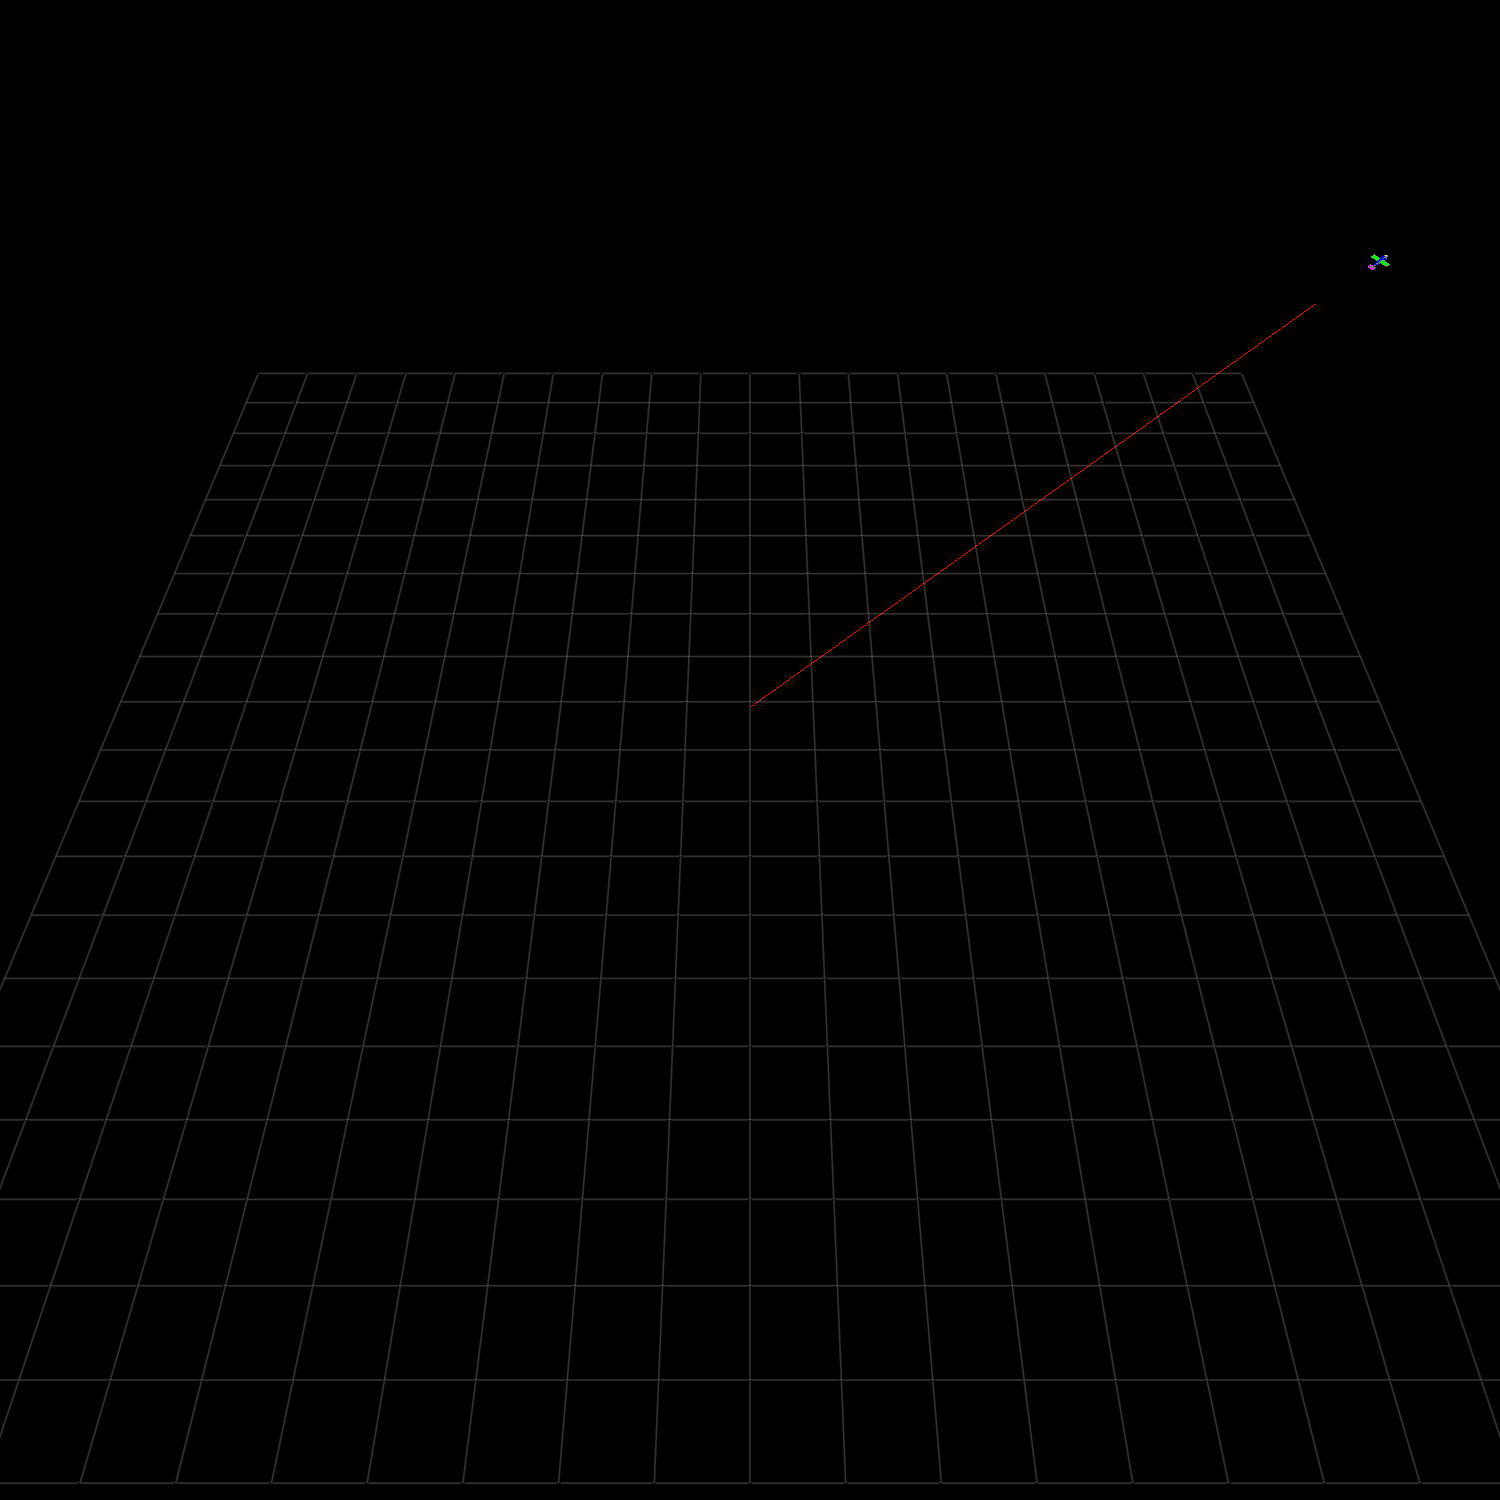

In [7]:
def main() -> None:
    """Provide a test scenario for chapter 10"""
    # Initialize the simulation parameters
    sim_params = MsgSimParams(end_time=50.0)  # Sim ending in 10 seconds
    state = DynamicState()

    # given two points define the origin and direction of the line
    w_i_0 = np.array([[0.0, 2.0, -100.0]]).T
    w_i_1 = np.array([[100.0, 200.0, -200.0]]).T
    line_direction = w_i_1 - w_i_0
    airspeed = 30.0

    # path definition
    path = MsgPath()
    path.type = "line"
    path.line_origin = w_i_0
    path.line_direction = line_direction / np.linalg.norm(line_direction)
    path.airspeed = airspeed
    # path.line_origin = np.array([[0.0, 0.0, -100.0]]).T
    # path.line_direction = np.array([[0.5, 1.0, 0.0]]).T
    # path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)

    # path.type = 'orbit'
    # path.orbit_center = np.array([[0.0, 0.0, -100.0]]).T  # center of the orbit
    # path.orbit_radius = 300.0  # radius of the orbit
    # path.orbit_direction = 'CW'  # orbit direction: 'CW'==clockwise, 'CCW'==counter clockwise

    def constant_path(_: float, __: MsgState) -> MsgPath:
        return path

    run_sim_and_display(path_fnc=constant_path)

if __name__ == "__main__":
    main()


## Problem 4: Trackable Orbit definition
Control the aircraft in a clockwise circular orbit around the point $w_0^i = \begin{bmatrix}400 \\ 200 \\ -100 \end{bmatrix}$ at a radius of 200 meters and airspeed of 25 m/s.

### Describe the results
The airplane come from outside the orbit path and circulars inward toward the circular orbit.


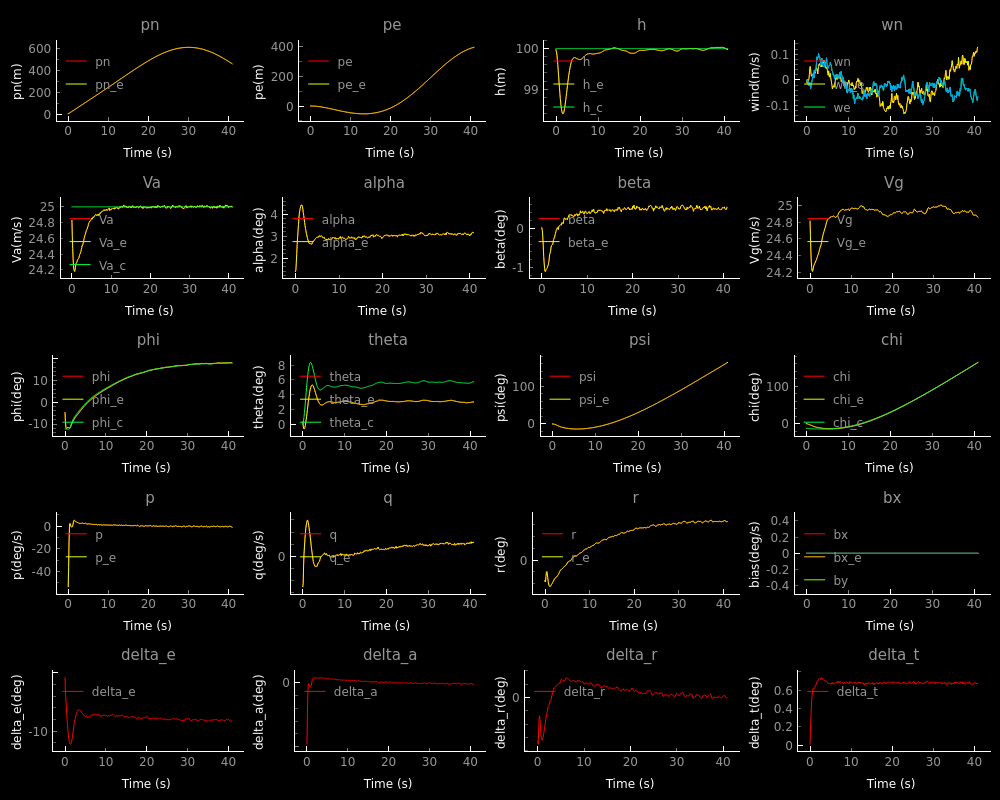

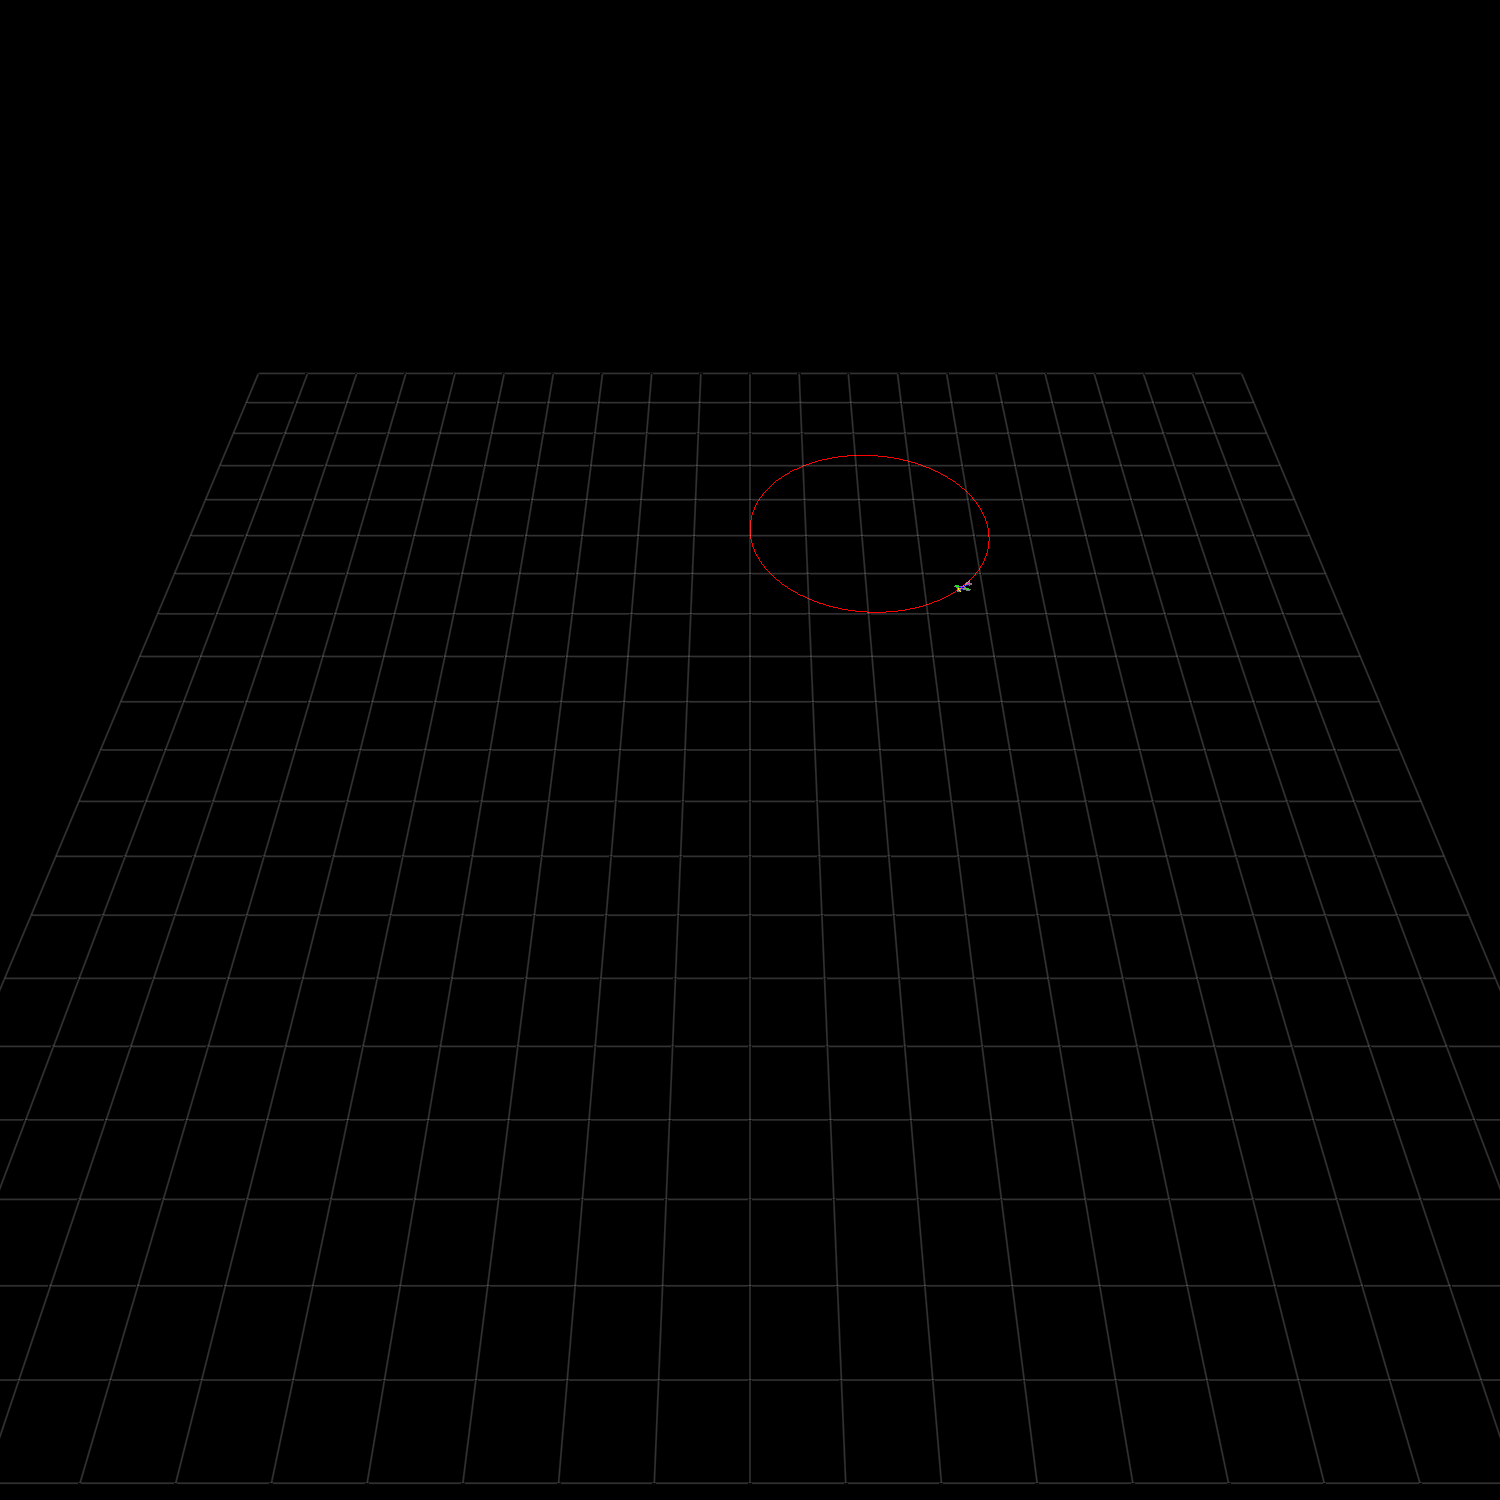

In [9]:
def main() -> None:
    """Provide a test scenario for chapter 10"""
    # Initialize the simulation parameters
    sim_params = MsgSimParams(end_time=50.0)  # Sim ending in 10 seconds
    state = DynamicState()

    # given two points define the origin and direction of the line
    w_i_0 = np.array([[400.0, 200.0, -100.0]]).T
    radius  = 200.0
    airspeed = 25.0

    # path definition
    path = MsgPath()
    # path.type = "line"
    # path.line_origin = w_i_0
    # path.line_direction = line_direction / np.linalg.norm(line_direction)
    # path.airspeed = airspeed
    # path.line_origin = np.array([[0.0, 0.0, -100.0]]).T
    # path.line_direction = np.array([[0.5, 1.0, 0.0]]).T
    # path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)

    path.type = 'orbit'
    path.orbit_center = w_i_0  # center of the orbit
    path.orbit_radius = radius  # radius of the orbit
    path.airspeed = airspeed
    # path.orbit_center = np.array([[0.0, 0.0, -100.0]]).T  # center of the orbit
    # path.orbit_radius = 300.0  # radius of the orbit
    path.orbit_direction = 'CW'  # orbit direction: 'CW'==clockwise, 'CCW'==counter clockwise

    def constant_path(_: float, __: MsgState) -> MsgPath:
        return path

    run_sim_and_display(path_fnc=constant_path)

if __name__ == "__main__":
    main()

## Problem 5: UnTrackable Orbit definition
Control the aircraft in a counter-clockwise circular orbit around the point $w_0^i = \begin{bmatrix}100 \\ -100 \\ -100 \end{bmatrix}$ at a radius of 75 meters and airspeed of 25 m/s.

### Describe the results
Plane aims for the orbit but overcorrects later on with the orbit and is unable to converge to the orbit.

### What do you notice about the radius and the ability to track the orbit?
When the orbit has a smaller radius the plane take longer to converge to the path and may not be possible depending on the airspeed and the roll that the airplane is able to sustain.

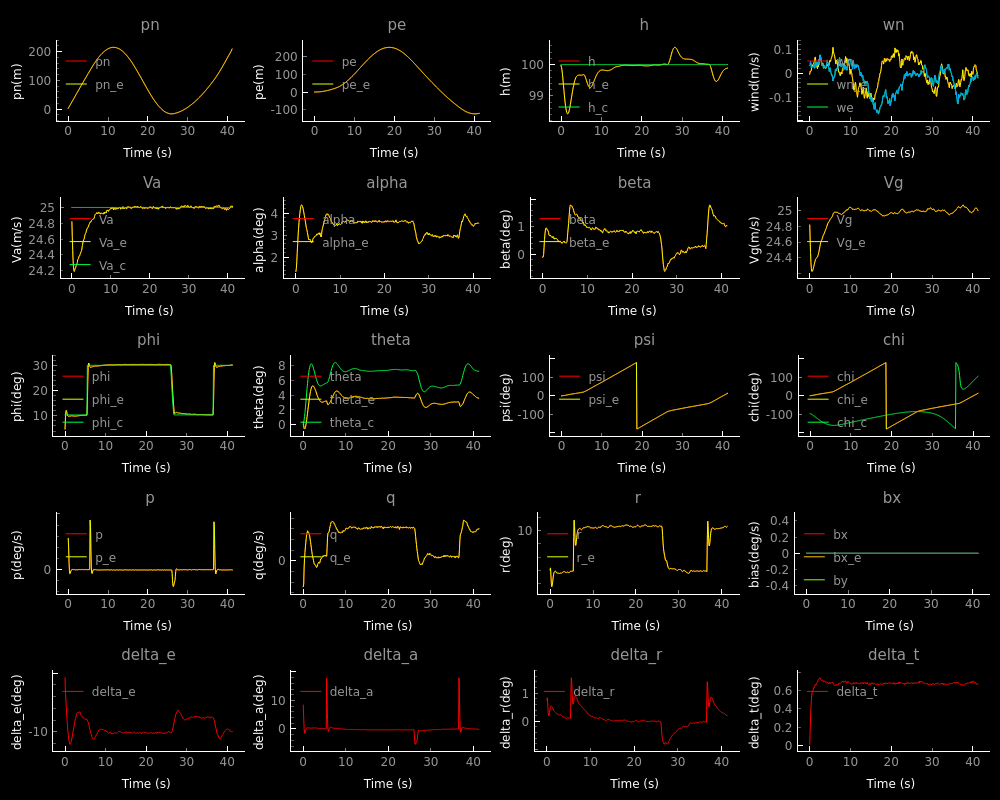

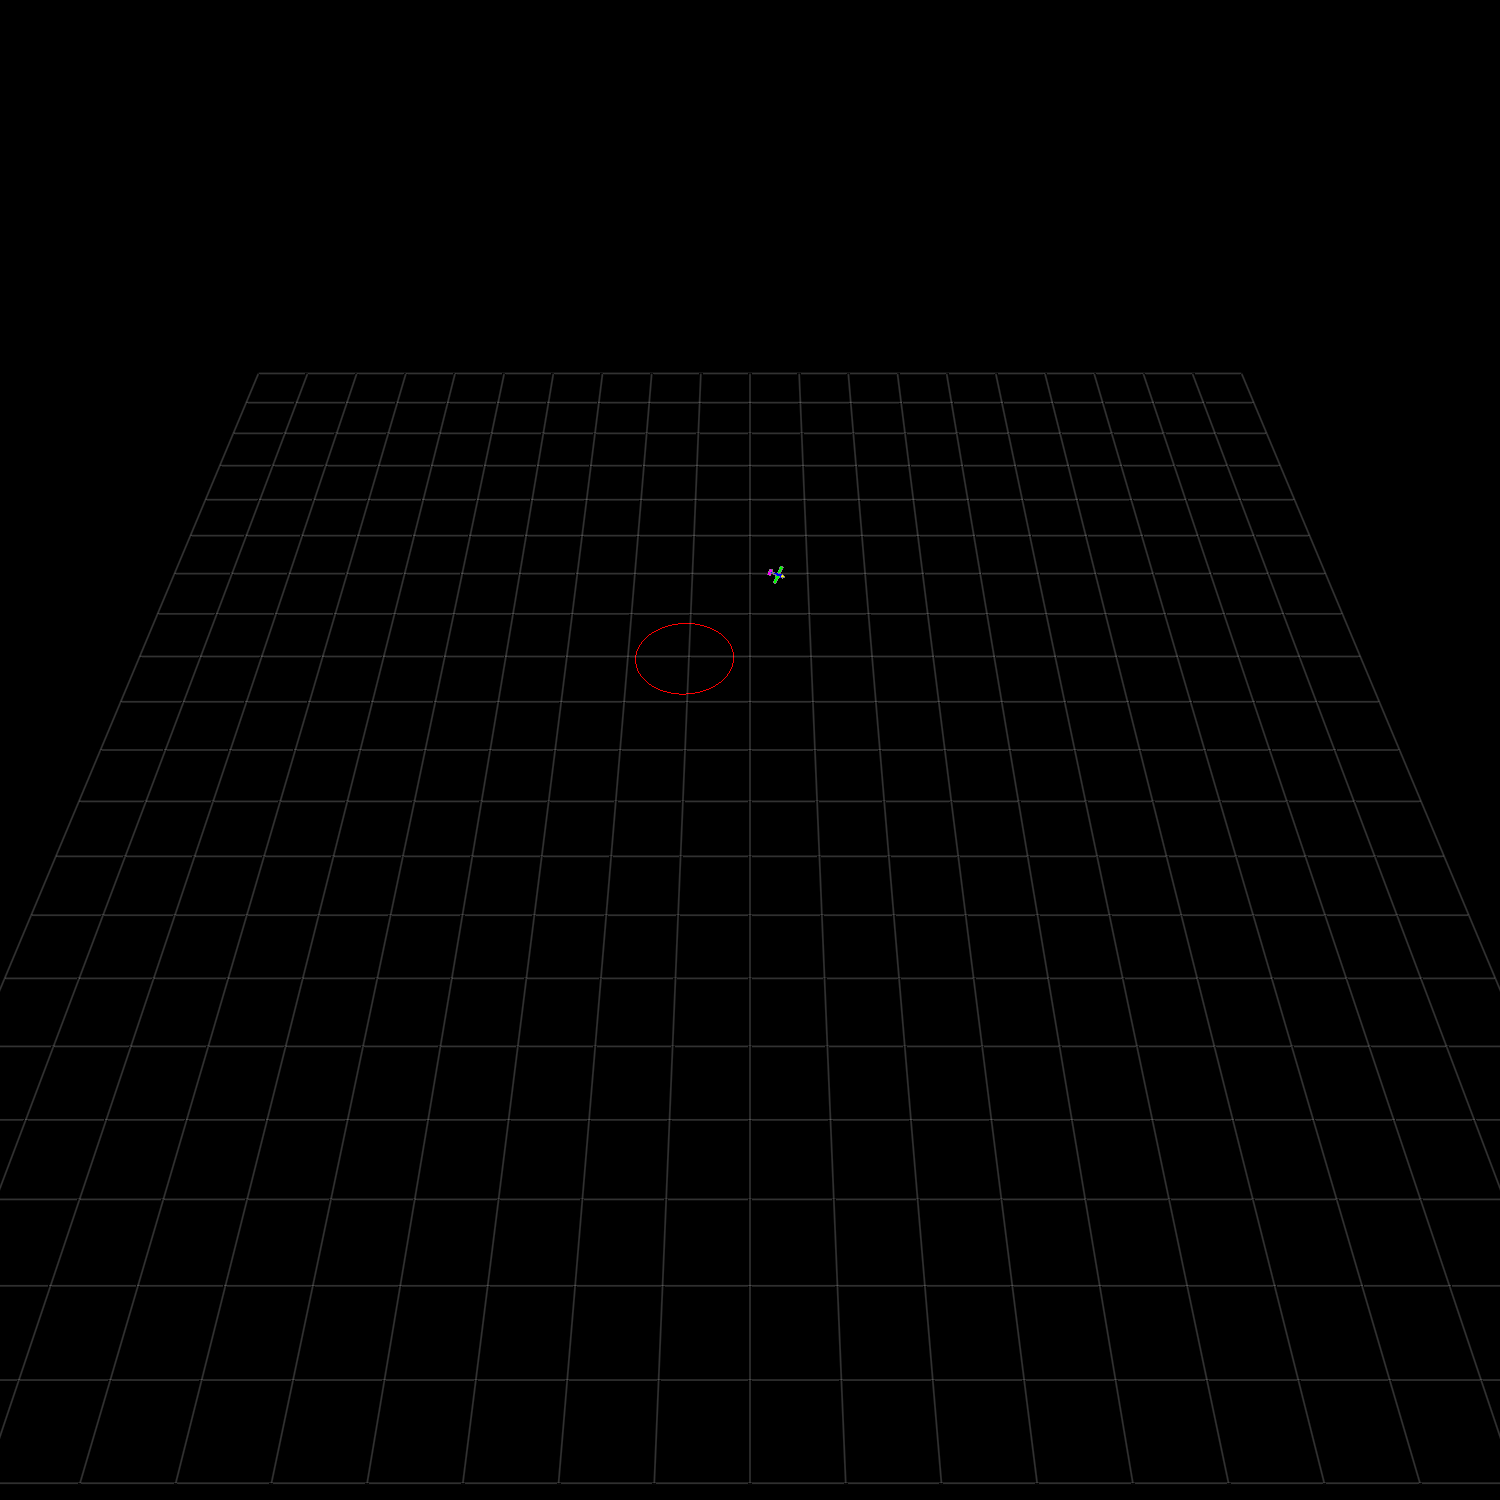

In [11]:
def main() -> None:
    """Provide a test scenario for chapter 10"""
    # Initialize the simulation parameters
    sim_params = MsgSimParams(end_time=50.0)  # Sim ending in 10 seconds
    state = DynamicState()

    # given two points define the origin and direction of the line
    w_i_0 = np.array([[100.0, -100.0, -100.0]]).T
    radius  = 75.0
    airspeed = 25.0

    # path definition
    path = MsgPath()
    # path.type = "line"
    # path.line_origin = w_i_0
    # path.line_direction = line_direction / np.linalg.norm(line_direction)
    # path.airspeed = airspeed
    # path.line_origin = np.array([[0.0, 0.0, -100.0]]).T
    # path.line_direction = np.array([[0.5, 1.0, 0.0]]).T
    # path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)

    path.type = 'orbit'
    path.orbit_center = w_i_0  # center of the orbit
    path.orbit_radius = radius  # radius of the orbit
    path.airspeed = airspeed
    # path.orbit_center = np.array([[0.0, 0.0, -100.0]]).T  # center of the orbit
    # path.orbit_radius = 300.0  # radius of the orbit
    path.orbit_direction = 'CW'  # orbit direction: 'CW'==clockwise, 'CCW'==counter clockwise

    def constant_path(_: float, __: MsgState) -> MsgPath:
        return path

    run_sim_and_display(path_fnc=constant_path)

if __name__ == "__main__":
    main()

## Problem 6: Switching control with no transition
Control the aircraft at 25 m/s using straight-line paths to move between waypoints $w_0^i = \begin{bmatrix}0 \\ 0 \\ -100 \end{bmatrix}$, $w_1^i = \begin{bmatrix}600 \\ 0 \\ -100 \end{bmatrix}$, $w_2^i = \begin{bmatrix}600 \\ 1 \\ -100 \end{bmatrix}$. Switch from executing linesegment $\overline{w_0 w_1}$ to $\overline{w_1 w_2}$ when the aircraft's north position is greater than or equal to the north position of $w_1^i$.

### Describe the quality of the path following
The plane first goes along a path straight north then one it passes the mark has to back track to the second path.

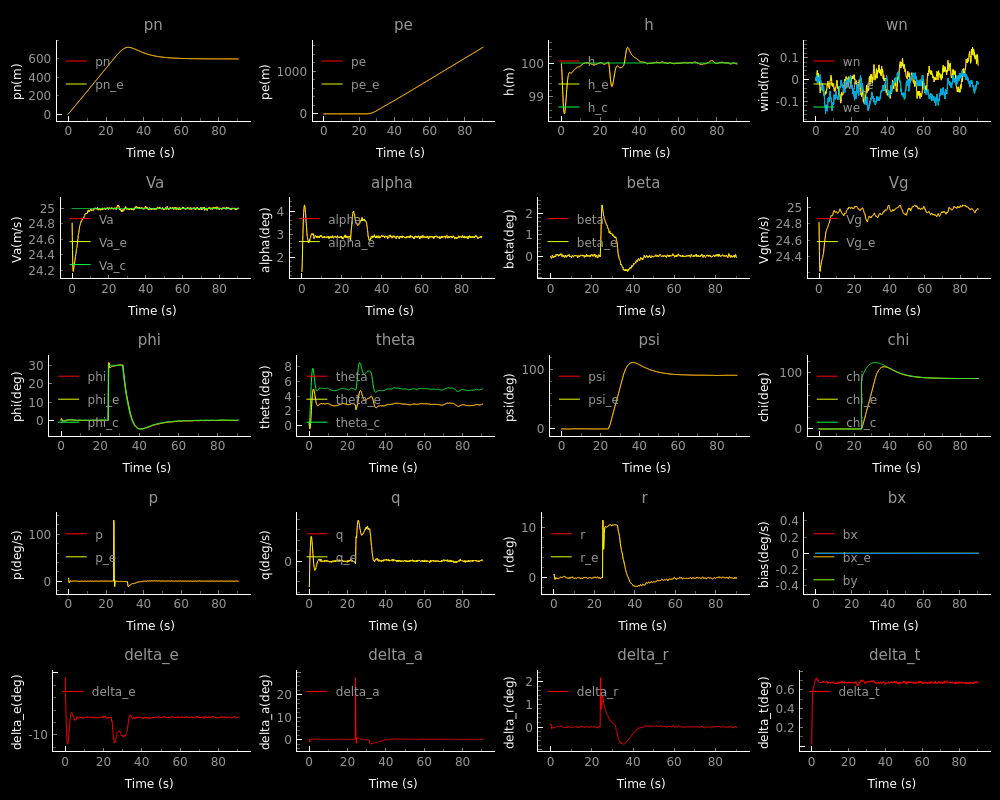

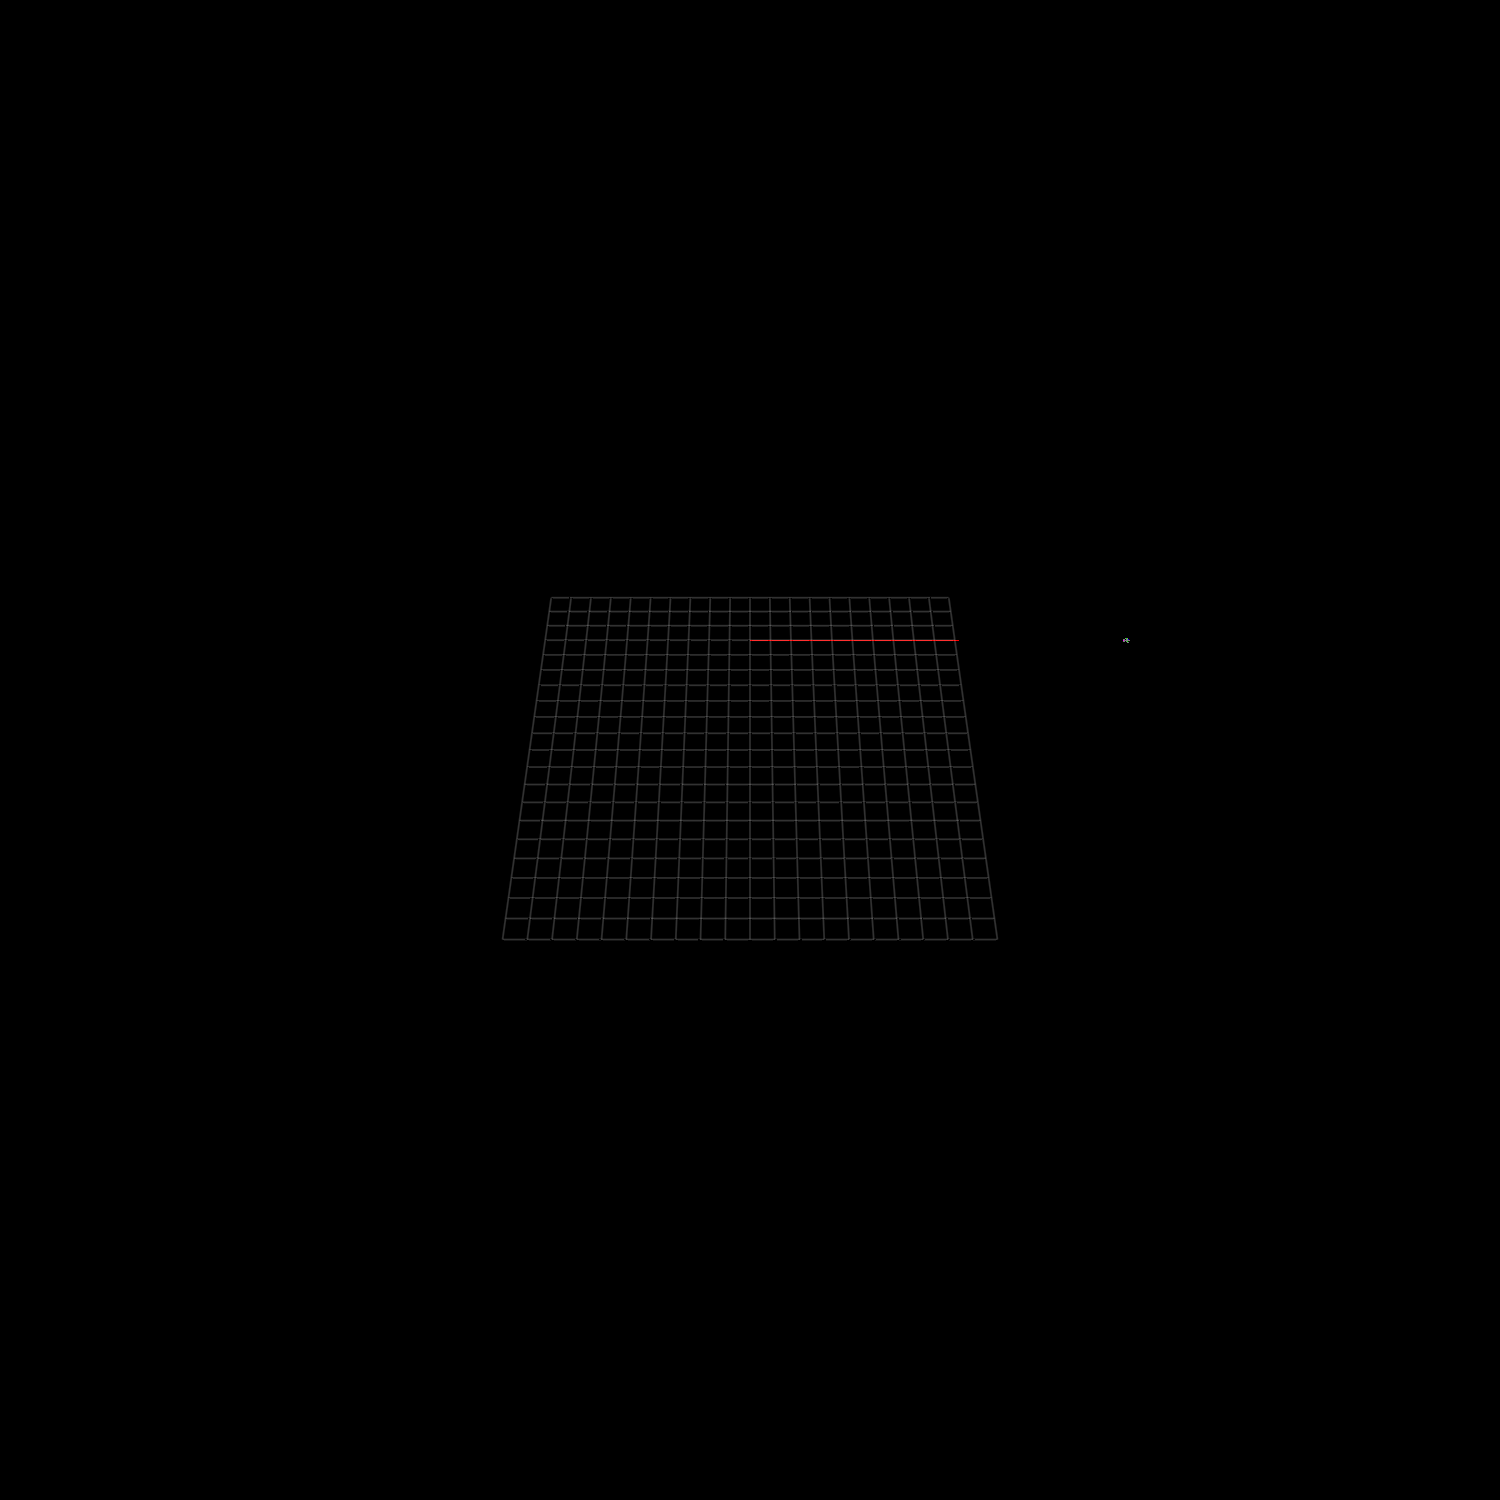

In [3]:
def main() -> None:
    """Provide a test scenario for chapter 10"""
    # Initialize the simulation parameters
    sim_params = MsgSimParams(end_time=100.0)  # Sim ending in 10 seconds
    state = DynamicState()

    # given two points define the origin and direction of the line
    w_i_0 = np.array([[0.0, 0.0, -100.0]]).T
    w_i_1 = np.array([[600.0, 0.0, -100.0]]).T
    w_i_2 = np.array([[600.0, 1.0, -100.0]]).T
    airspeed = 25.0
    w1_line_direction = w_i_1 - w_i_0
    w2_line_direction = w_i_2 - w_i_1

    # path definition
    path1 = MsgPath()
    path2 = MsgPath()
    path1.type = "line"
    path1.line_origin = w_i_0
    path1.line_direction = w1_line_direction / np.linalg.norm(w1_line_direction)
    path1.airspeed = airspeed

    path2.type = "line"
    path2.line_origin = w_i_1
    path2.line_direction = w2_line_direction / np.linalg.norm(w2_line_direction)
    path2.airspeed = airspeed
    # path.line_origin = w_i_0
    # path.line_direction = line_direction / np.linalg.norm(line_direction)
    # path.airspeed = airspeed
    # path.line_origin = np.array([[0.0, 0.0, -100.0]]).T
    # path.line_direction = np.array([[0.5, 1.0, 0.0]]).T
    # path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)

    # path.type = 'orbit'
    # path.orbit_center = w_i_0  # center of the orbit
    # path.orbit_radius = radius  # radius of the orbit
    # path.airspeed = airspeed
    # path.orbit_center = np.array([[0.0, 0.0, -100.0]]).T  # center of the orbit
    # path.orbit_radius = 300.0  # radius of the orbit
    # path.orbit_direction = 'CW'  # orbit direction: 'CW'==clockwise, 'CCW'==counter clockwise

    def switching_path(_: float, state: MsgState) -> MsgPath:

        #set between going on one path or the other path
        #calculate if north position is greater than w_i_1
        if state.north > w_i_1[0]:
            return path2
        else:
            return path1


    run_sim_and_display(path_fnc=switching_path)

if __name__ == "__main__":
    main()

## Problem 7: Switching control with arc transition
Repeat problem 6, but instead of having a hard switch between $\overline{w_0 w_1}$ and $\overline{w_1 w_2}$, you will use a circular arc of radius 150 m to perform the switch. Create a circular orbit such that it has exactly one tangent point on $\overline{w_0 w_1}$ and one on $\overline{w_1 w_2}$. Switch to the arc when the aircraft north state has reached the value of the tangent point. Switch from executing the arc to executing $\overline{w_1 w_2}$ when the aircraft east state has reached the value of the tangent point.

### Describe the quality of the path following
Worked like a charm, the orbit I put had a radius of 200. So the plane went forward till it was tangent to the orbit then rotated, then continued straight. It was beautiful

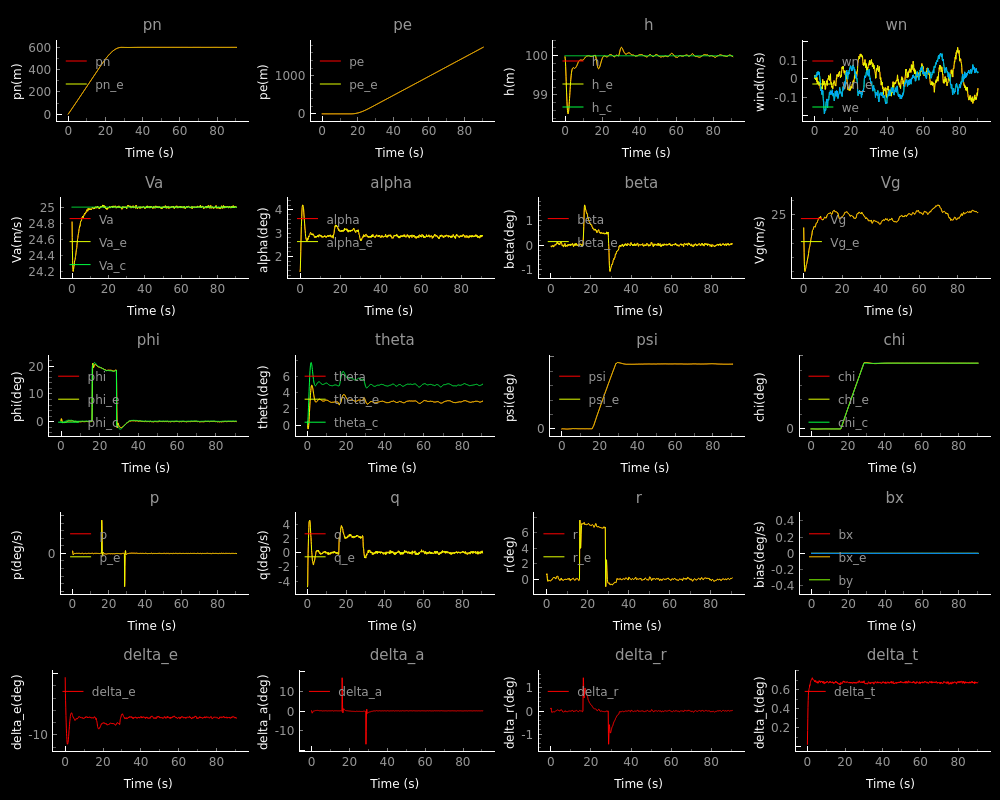

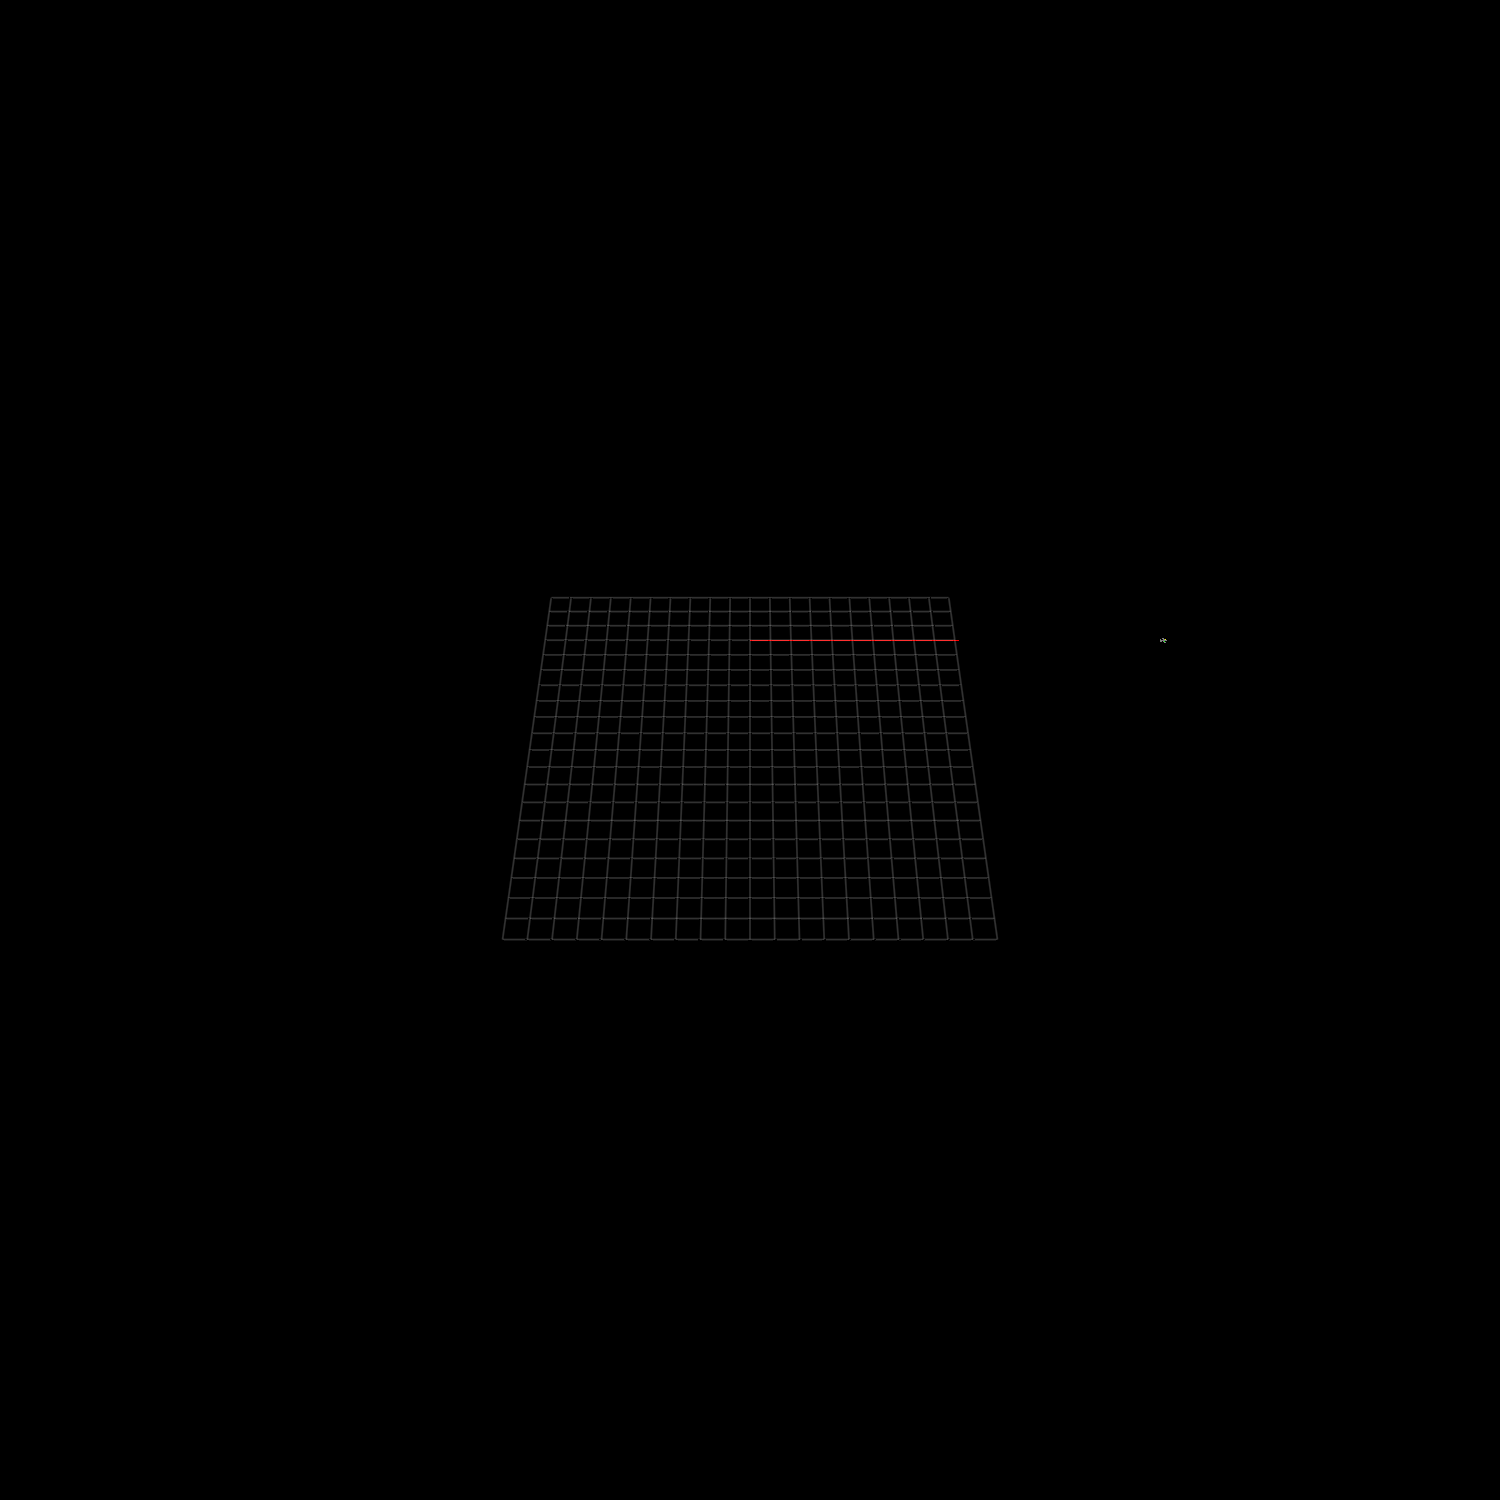

In [4]:
def main() -> None:
    """Provide a test scenario for chapter 10"""
    # Initialize the simulation parameters
    sim_params = MsgSimParams(end_time=100.0)  # Sim ending in 10 seconds
    state = DynamicState()

    # given two points define the origin and direction of the line
    w_i_0 = np.array([[0.0, 0.0, -100.0]]).T
    w_i_1 = np.array([[600.0, 0.0, -100.0]]).T
    w_i_2 = np.array([[600.0, 1.0, -100.0]]).T
    orbit_center = np.array([[400.0, 200.0, -100.0]]).T #calculated
    radius = 200.0 #calculated
    airspeed = 25.0
    w1_line_direction = w_i_1 - w_i_0
    w2_line_direction = w_i_2 - w_i_1

    # path definition
    path1 = MsgPath()
    path2 = MsgPath()
    orbit = MsgPath()
    path1.type = "line"
    path1.line_origin = w_i_0
    path1.line_direction = w1_line_direction / np.linalg.norm(w1_line_direction)
    path1.airspeed = airspeed

    path2.type = "line"
    path2.line_origin = w_i_1
    path2.line_direction = w2_line_direction / np.linalg.norm(w2_line_direction)
    path2.airspeed = airspeed

    orbit.type = 'orbit'
    orbit.orbit_center = orbit_center  # center of the orbit
    orbit.orbit_radius = radius  # radius of the orbit
    orbit.airspeed = airspeed

    # path.line_origin = w_i_0
    # path.line_direction = line_direction / np.linalg.norm(line_direction)
    # path.airspeed = airspeed
    # path.line_origin = np.array([[0.0, 0.0, -100.0]]).T
    # path.line_direction = np.array([[0.5, 1.0, 0.0]]).T
    # path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)

    # path.type = 'orbit'
    # path.orbit_center = w_i_0  # center of the orbit
    # path.orbit_radius = radius  # radius of the orbit
    # path.airspeed = airspeed
    # path.orbit_center = np.array([[0.0, 0.0, -100.0]]).T  # center of the orbit
    # path.orbit_radius = 300.0  # radius of the orbit
    # path.orbit_direction = 'CW'  # orbit direction: 'CW'==clockwise, 'CCW'==counter clockwise

    def switching_path(time: float, state: MsgState) -> MsgPath:
        #if state.north > 400, switch to orbit, then if state.east > 200, switch to line
        if state.east > orbit_center[1]:
            return path2
        elif state.north > orbit_center[0]:
            return orbit
        else:
            return path1

    run_sim_and_display(path_fnc=switching_path)

if __name__ == "__main__":
    main()

## Static analysis
Run the static code analysis (you must have zero static code analysis errors to get credit). You may not modify the static code analysis configuration files.

### ISORT
Run Isort:
```
python -m isort mav_sim book_assignments
```

Terminal output (should be nothing):

### MyPy
Run MyPy
```
python -m mypy mav_sim/chap2/ mav_sim/chap3/ mav_sim/chap4/ mav_sim/chap5/ mav_sim/chap6/ mav_sim/chap10/ book_assignments
```

Terminal output (should indicate no error):
```
Success: no issues found in 41 source files
s```

### Pylint
Run Pylint
```
python -m pylint --jobs 0 --rcfile .pylintrc mav_sim/chap2/ mav_sim/chap3/ mav_sim/chap4/ mav_sim/chap5/ mav_sim/chap6/ mav_sim/chap10/ book_assignments/
```

Terminal output (should indicate `10/10`)
```
-------------------------------------------------------------------
Your code has been rated at 10.00/10 (previous run: 9.99/10, +0.01)
```

## Simple code checking
The following code does not need to change. It should just be used as a sanity check so that you know the code is implemented properly. The output should not have any lines reading `Failed test!`

In [ ]:
from mav_sim.unit_tests.ch10_path_follower_test import run_all_tests
run_all_tests()

Starting follow_straight_line test
End of test

Starting follow_orbit test
End of test

